In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("F:\Diabetes_Project\diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [7]:
dataset['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

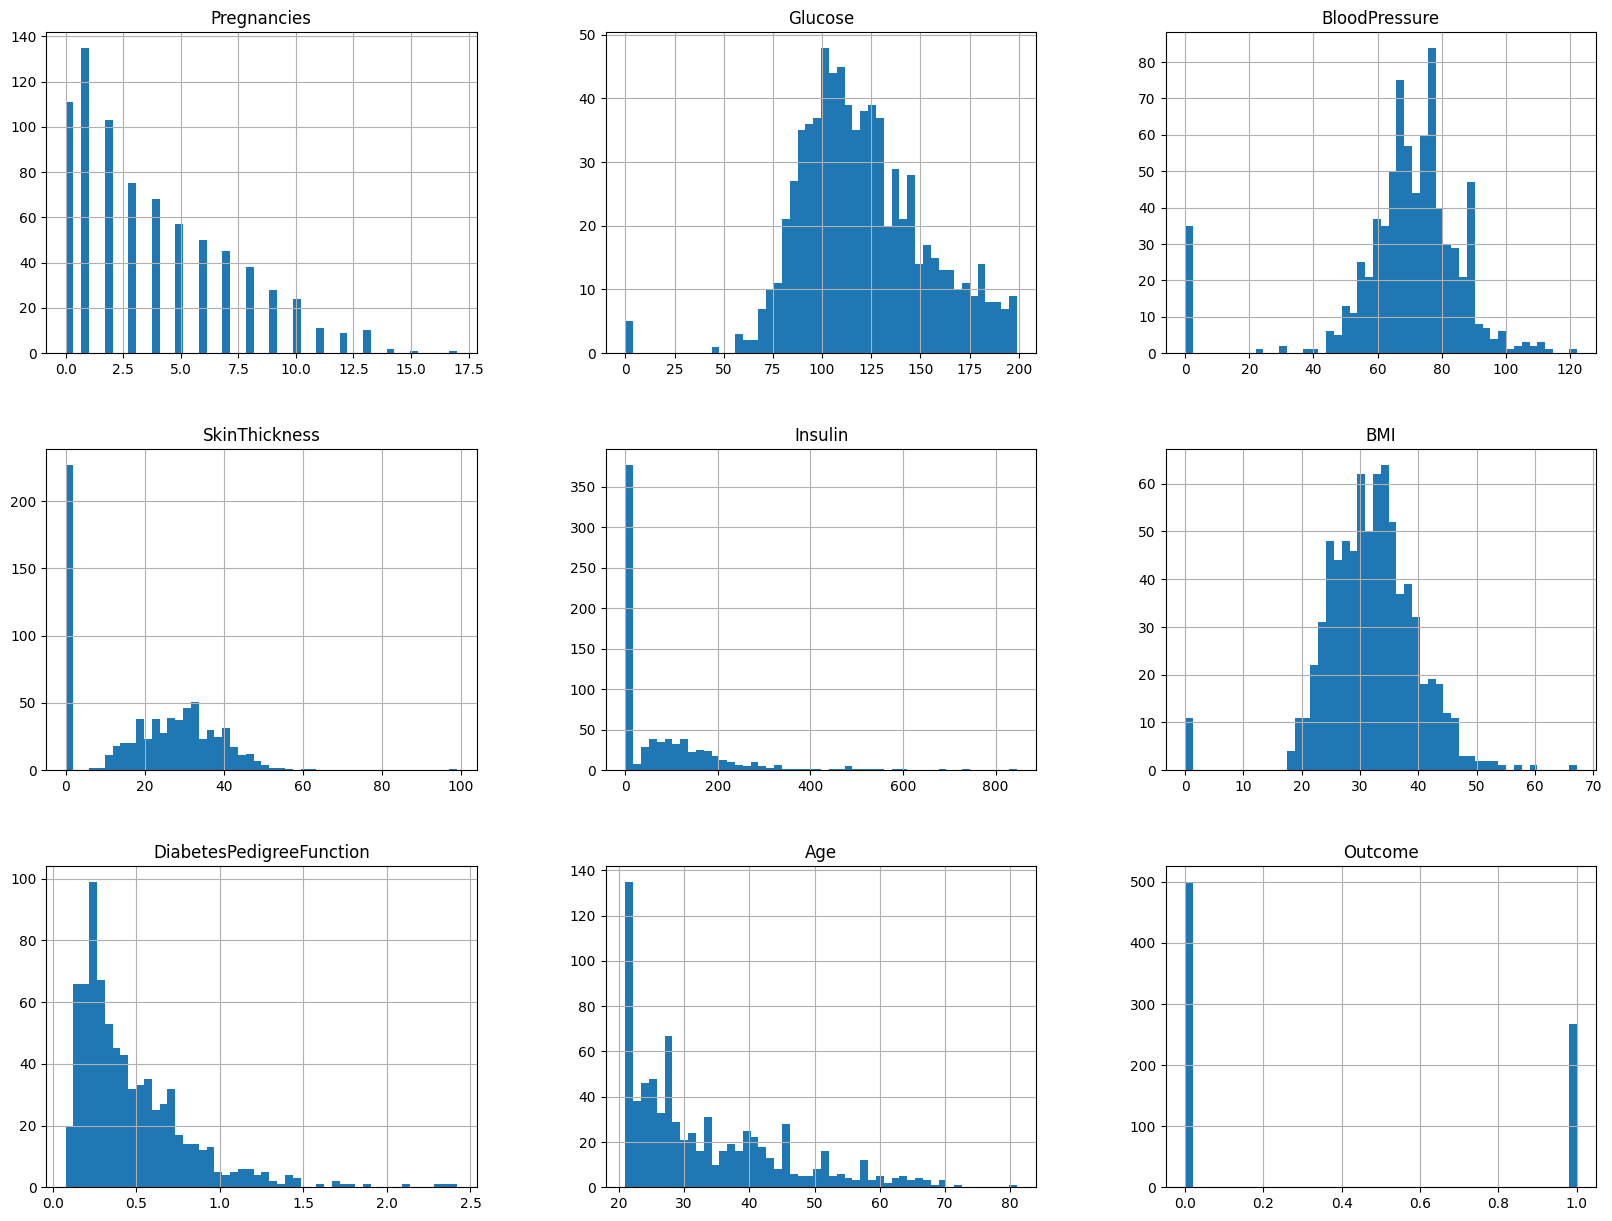

In [9]:
dataset.hist(bins=50, figsize=(20,15))

# Train - Test Splitting

In [10]:
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int (len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset,test_size=0.2, random_state = 42)

In [12]:
print(f"Rows in train set: {len (train_set)}\n Rows in test_set {len(test_set)}\n")

Rows in train set: 614
 Rows in test_set 154



In [13]:
dataset = train_set.copy()

In [14]:
dataset.shape

(614, 9)

# Looking for correlations

In [15]:
corr_matrix = dataset.corr()

In [16]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.456117
BMI                         0.306335
Age                         0.280654
Pregnancies                 0.207550
DiabetesPedigreeFunction    0.154560
Insulin                     0.108498
BloodPressure               0.082046
SkinThickness               0.057912
Name: Outcome, dtype: float64

array([[<Axes: xlabel='Outcome', ylabel='Outcome'>,
        <Axes: xlabel='Glucose', ylabel='Outcome'>,
        <Axes: xlabel='BMI', ylabel='Outcome'>,
        <Axes: xlabel='SkinThickness', ylabel='Outcome'>],
       [<Axes: xlabel='Outcome', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>],
       [<Axes: xlabel='Outcome', ylabel='BMI'>,
        <Axes: xlabel='Glucose', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='SkinThickness', ylabel='BMI'>],
       [<Axes: xlabel='Outcome', ylabel='SkinThickness'>,
        <Axes: xlabel='Glucose', ylabel='SkinThickness'>,
        <Axes: xlabel='BMI', ylabel='SkinThickness'>,
        <Axes: xlabel='SkinThickness', ylabel='SkinThickness'>]],
      dtype=object)

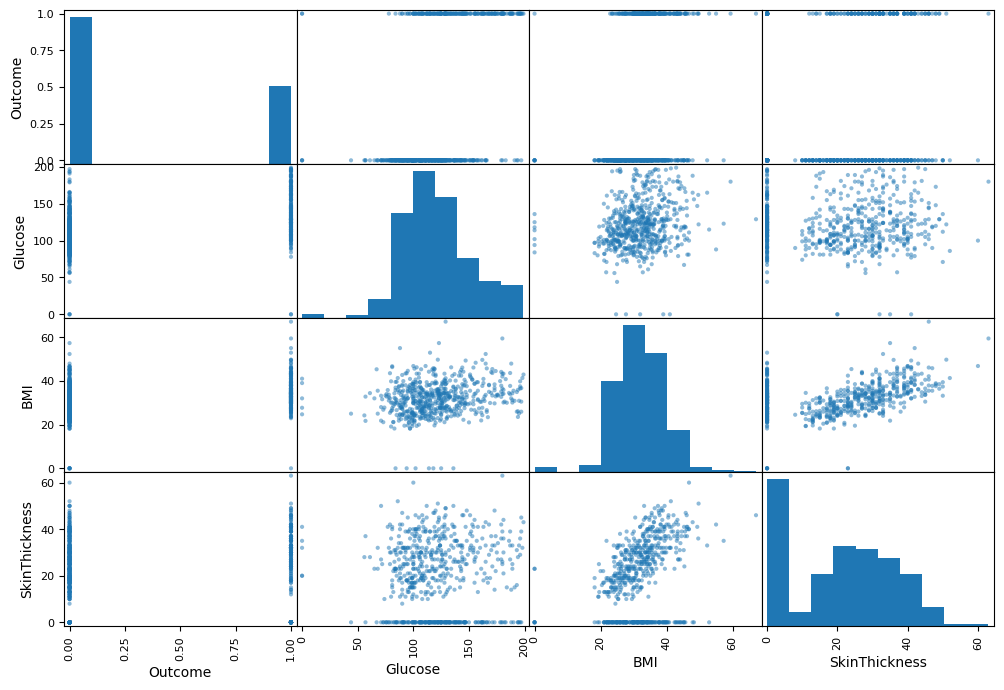

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['Outcome','Glucose','BMI','SkinThickness']
scatter_matrix(dataset[attributes],figsize = (12,8))

<Axes: xlabel='Glucose', ylabel='Outcome'>

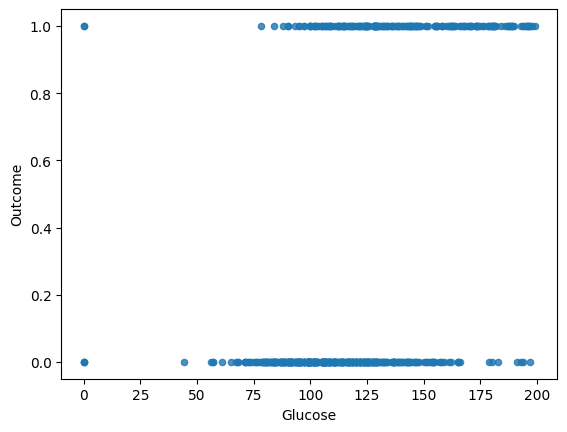

In [18]:
dataset.plot(kind="scatter", x="Glucose", y="Outcome",alpha =0.8)

In [19]:
dataset = train_set.drop("Outcome", axis =1)
dataset_labels = train_set["Outcome"].copy()

In [20]:
dataset_labels.shape

(614,)

# Handling missing attributes

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(dataset)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_

array([  3.    , 117.    ,  72.    ,  23.    ,  42.5   ,  32.    ,
         0.3725,  29.    ])

In [23]:
X = imputer.transform(dataset)

In [24]:
dataset_tr = pd.DataFrame(X, columns=dataset.columns)

In [25]:
dataset_tr.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,20.399023,81.438111,31.983388,0.469168,32.907166
std,3.313264,32.035057,18.512599,15.433974,116.234835,7.740625,0.336847,11.503437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.241500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [27]:
dataset_num_tr = my_pipeline.fit_transform(dataset)

In [28]:
dataset_num_tr.shape

(614, 8)

# Selecting model

In [29]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [30]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(dataset, dataset_labels)

SVC(kernel='linear')

In [31]:
x_test = test_set.drop("Outcome", axis =1)
y_test = test_set["Outcome"].copy()
y_pred = clf.predict(x_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7532467532467533


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [34]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6545454545454545
Recall: 0.6545454545454545
F1 Score: 0.6545454545454545


In [35]:
import joblib
# Assuming 'dataset' and 'dataset_labels' are your training data
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(dataset, dataset_labels)

# Save the trained model to a file
joblib.dump(clf, 'svm_model.joblib')

['svm_model.joblib']